# 1. Описание данных

Данные представляют собой информацию о физических данных спортсменов и их результатах в Олимпийских играх. Рассматриваются Олимпийские игры за 120 лет, начиная с **Афин** (1896), заканчивая последней олипиадой в **Рио** (2016).

Данные были скачаны с kaggle: https://www.kaggle.com/heesoo37/120-years-of-olympic-history-athletes-and-results


In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import squarify 
%matplotlib inline


import os

In [2]:
Events = pd.read_csv("D:/Masters/Python/JN/Olympics/athlete_events.csv")
Events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
ID        271116 non-null int64
Name      271116 non-null object
Sex       271116 non-null object
Age       261642 non-null float64
Height    210945 non-null float64
Weight    208241 non-null float64
Team      271116 non-null object
NOC       271116 non-null object
Games     271116 non-null object
Year      271116 non-null int64
Season    271116 non-null object
City      271116 non-null object
Sport     271116 non-null object
Event     271116 non-null object
Medal     39783 non-null object
dtypes: float64(3), int64(2), object(10)
memory usage: 20.7+ MB


In [3]:
Events.head(n=3)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN


Мы видим, что всего в данных **Events** 271 116 строк и 15 столбцов, но значений параметров Age,Height,Weight и Medal недостает. Относительно биометрических данных, это может быть связано просто нехваткой/сбоем в сборе данных. А отношении Medal это можно обхяснить тем, что далеко не каждый атлет смог завоевать медаль. Поэтому из 271 тысячи только 39 тысяч имеют информацию о медалях.

In [4]:
NOC = pd.read_csv("D:/Masters/Python/JN/Olympics/noc_regions.csv")
NOC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230 entries, 0 to 229
Data columns (total 3 columns):
NOC       230 non-null object
region    227 non-null object
notes     21 non-null object
dtypes: object(3)
memory usage: 2.7+ KB


In [5]:
NOC.head()

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


NOC - это просто инфа о стране участника. NOC - индекс страны, а сама страна указана в стобце region. Столбец notes нам не понадобится.
Объединим Events и NOC:

In [6]:
Data=Events.merge(NOC,on='NOC',how='left')
Data.head(n=3)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN


# 2. Exploratory Analysis

### 2.1 Сколько было летних и зимних игр?

In [7]:
Olympics=Data.groupby(by=['Year','Season','City'], as_index=False).first()
Olympics=Olympics[['Year','Season','City']]
Olympics.loc[Olympics['Season']=='Summer'].reset_index()

,index,Year,Season,City
0,0,1896,Summer,Athina
1,1,1900,Summer,Paris
2,2,1904,Summer,St. Louis
3,3,1906,Summer,Athina
4,4,1908,Summer,London
5,5,1912,Summer,Stockholm
6,6,1920,Summer,Antwerpen
7,7,1924,Summer,Paris
8,9,1928,Summer,Amsterdam
9,11,1932,Summer,Los Angeles


Летних олимпийских игр уже было 29 штук. Примечательно, что порядковый номер индекса начнает отличаться от фактического порядкового номера олимпиады после седьмых игр в Париже в 1924г. Это объясняется тем, что после этого появилсиь и Зимние Олимпийские игры, которые были проведены 21 раз:

In [8]:
Olympics.loc[Olympics['Season']=='Winter'].reset_index()

,index,Year,Season,City
0,8,1924,Winter,Chamonix
1,10,1928,Winter,Sankt Moritz
2,12,1932,Winter,Lake Placid
3,14,1936,Winter,Garmisch-Partenkirchen
4,16,1948,Winter,Sankt Moritz
5,18,1952,Winter,Oslo
6,21,1956,Winter,Cortina d'Ampezzo
7,23,1960,Winter,Squaw Valley
8,25,1964,Winter,Innsbruck
9,27,1968,Winter,Grenoble


### 2.2 Наиболее масштабные по мероприятиям олимпийские виды спорта

Посмотрим на топ-15 олимпийских видов спорта, в которых произошло больше всего спортивных мероприятий (матчей, забегов, розыгрышей медалей и т.д.):

In [9]:
Events.groupby('Sport',as_index=False)['Event'].count().sort_values(by='Event',ascending=False).head(15)

,Sport,Event
5,Athletics,38624
27,Gymnastics,26707
54,Swimming,23195
47,Shooting,11448
19,Cycling,10859
22,Fencing,10735
43,Rowing,10595
17,Cross Country Skiing,9133
1,Alpine Skiing,8829
65,Wrestling,7154


### 2.3 Исследование медалей

Посмотрим на топ-10 самых успешных стран по количеству выигранных медалей:

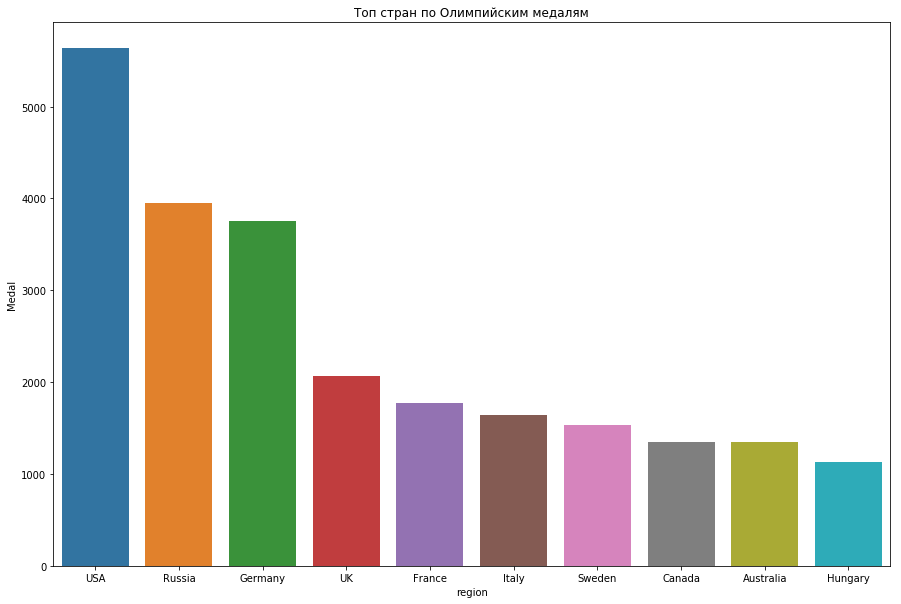

In [10]:
plt.figure(figsize=(15, 10))
topc=Data.groupby('region')['Medal'].count().nlargest(10).reset_index()
sns.barplot('region','Medal',data=topc)
plt.title('Топ стран по Олимпийским медалям')
plt.show()

Посмотрим, как в этих странах распределились их медали Летних играх:

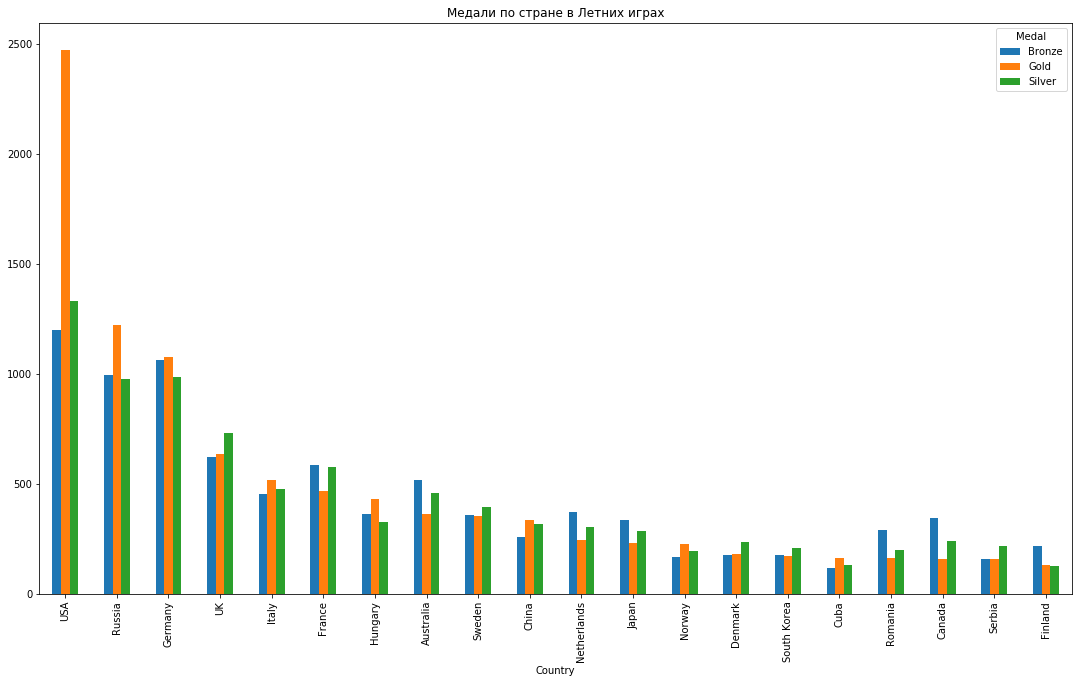

In [11]:
c_medal=Data[Data['Season']=='Summer'].groupby(['region','Medal'])['Sex'].count().reset_index()
c_medal=c_medal.pivot('region','Medal','Sex').fillna(0).sort_values(by='Gold',ascending=False).head(20)
c_medal.plot(kind='bar')
plt.xlabel('Country')
plt.title('Медали по стране в Летних играх')
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.show()

...а теперь посмотрим по Зимним:

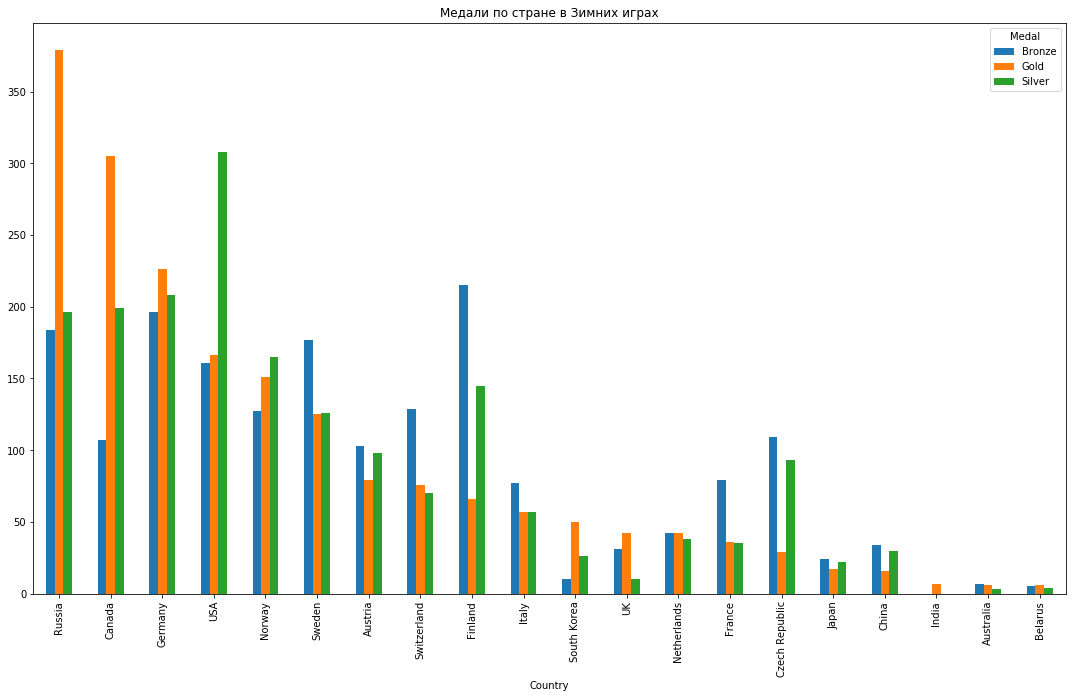

In [76]:
c_medal=Data[Data['Season']=='Winter'].groupby(['region','Medal'])['Sex'].count().reset_index()
c_medal=c_medal.pivot('region','Medal','Sex').fillna(0).sort_values(by='Gold',ascending=False).head(20)
c_medal.plot(kind='bar')
plt.xlabel('Country')
plt.title('Медали по стране в Зимних играх')
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.show()

Здесь мы на 1-м месте, что приятно :)

### 2.4 Исследование физических данных атлетов

Посмотрим на рост спотсменов в зависимости от вида спорта:

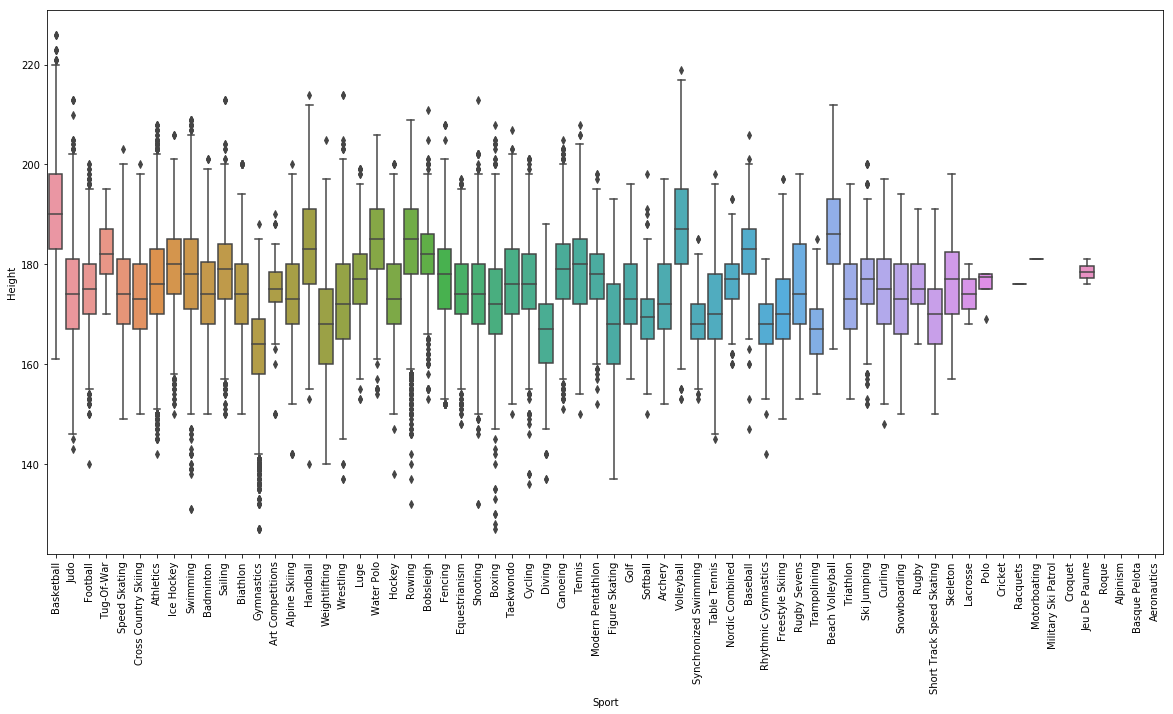

In [13]:
plt.figure(figsize=(20, 10))
sns.boxplot(x='Sport',y='Height',data=Data)

plt.xticks(rotation = 90)
plt.show()

Как и ожидалось, наиболее высокий рост соответсвует: баскетболитсам, волейболистам, гандболистам, ватерполистам (водное поло). Спортсмены из гимнастики и дайвинга, наоборот, имеют более низкий рост.

Посмотрим теперь на вес спортсменов:

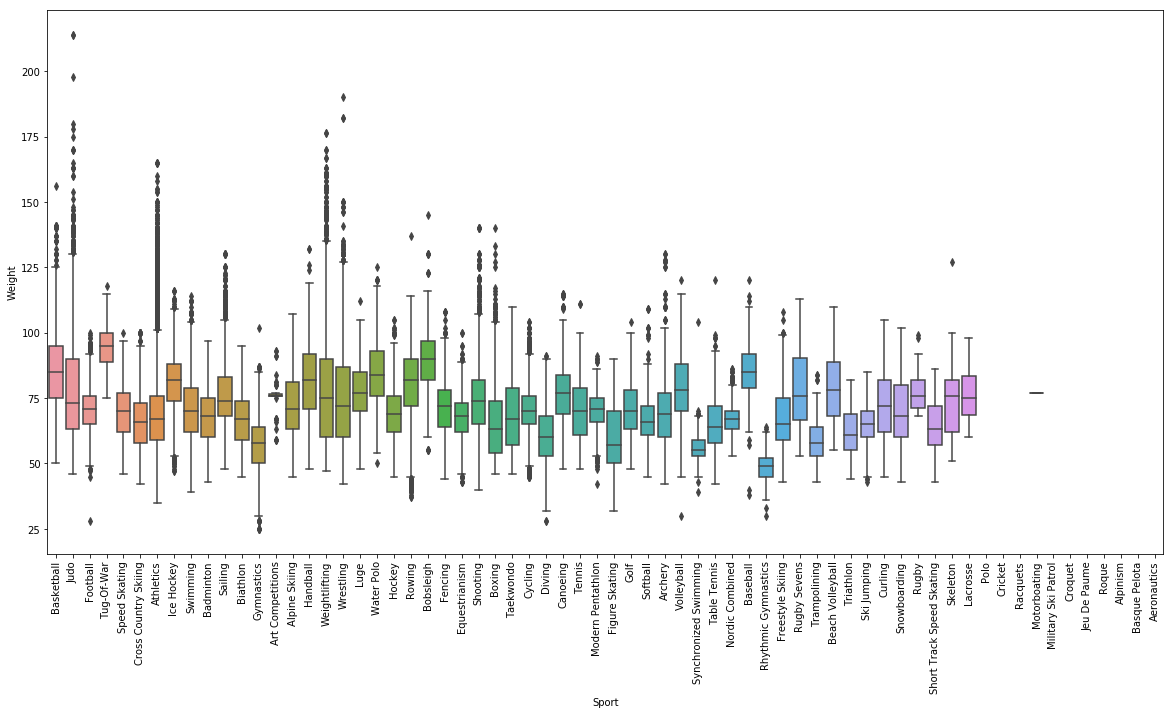

In [14]:
plt.figure(figsize=(20, 10))
sns.boxplot(x='Sport',y='Weight',data=Data)

plt.xticks(rotation = 90)
plt.show()

Поскольку гимнатсы ниже, они легче. Интересно, что самые тяжелые спорстмены встречаются в Tug-Of-War (перетягивание каната), бобслее и бейсболе.

### 2.5 Исследование участия нашей страны

Посмотрим на топ-15 дисциплин, в которых российские спортсмены участвовали больше всего:

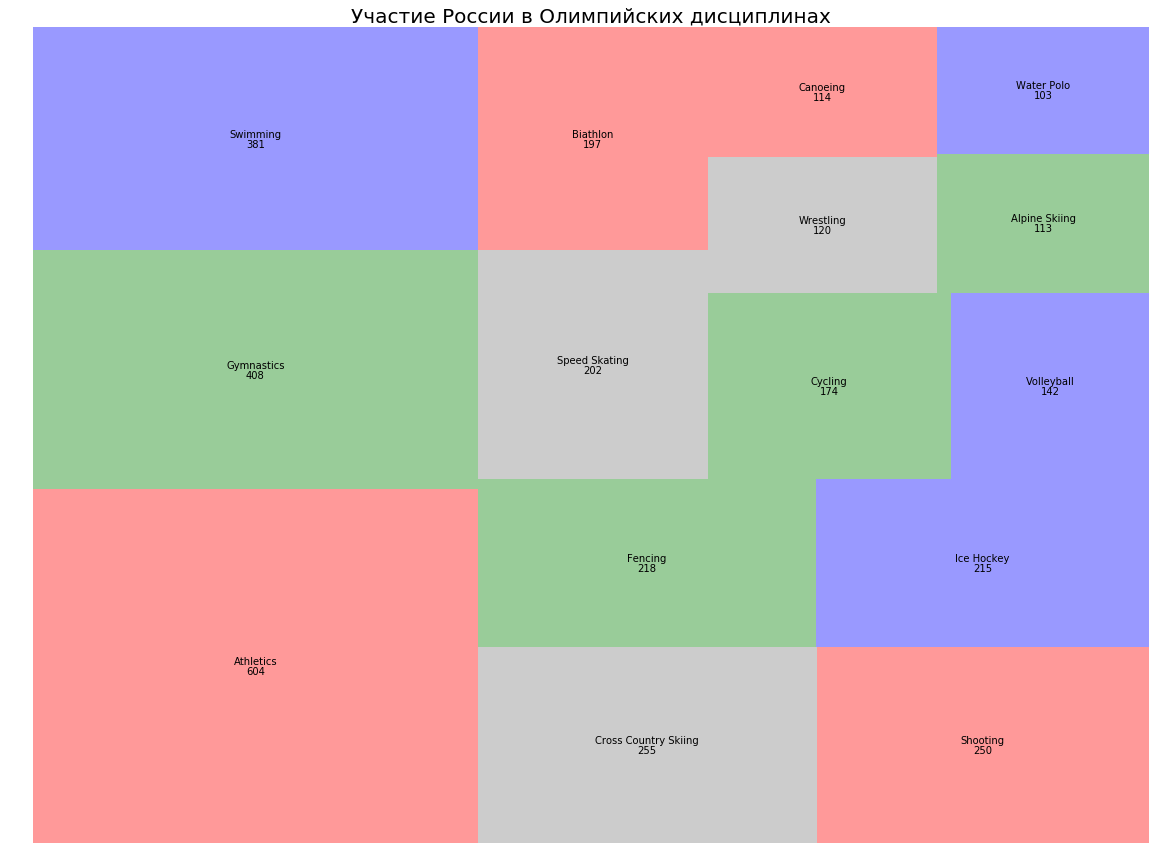

In [15]:
Russia_part=Events[Events['Team']=='Russia']['Sport'].value_counts().head(15)
plt.figure(figsize=(20,15))
g = squarify.plot(sizes=Russia_part.values, label=Russia_part.index, 
                  value=Russia_part.values,
                  alpha=.4,color=["red","green","blue", "grey"])
g.set_title("Участие России в Олимпийских дисциплинах",fontsize=20)
g.set_axis_off()
plt.show()

# 3. Machine Learning

В этой части будем строить модели по прогнозированию. Попытаемся предсказать пол спортсмена, исходя из его антропопметрических данных, страны, виде спорта, возраста и медали, которую он смог завоевать. 
Для начала получим необходимый датасет, убрав из него все ненужное:


===

*p.s. сначала пытался предсказать, какую медаль завоюет атлет, зная его пол, рост, вес, страну и вид спорта. Лучший accuracy был достгнут при построении случайного леса и составил всего 41%, что говорит о отсуствии какой-либо заакономерности и низкой полезности моделей.*

In [16]:
Data.head(n=3)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN


In [17]:
Data2 = Data.drop(['ID', 'Year', 'Name','NOC','Games','City','notes', 'Team', 'Event'], axis = 1)
Data2.head(3)

,Sex,Age,Height,Weight,Season,Sport,Medal,region
0,M,24.0,180.0,80.0,Summer,Basketball,NaN,China
1,M,23.0,170.0,60.0,Summer,Judo,NaN,China
2,M,24.0,NaN,NaN,Summer,Football,NaN,Denmark


In [18]:
Data3 = Data2.dropna()
Data3.head(3)

,Sex,Age,Height,Weight,Season,Sport,Medal,region
40,M,28.0,184.0,85.0,Winter,Ice Hockey,Bronze,Finland
41,M,28.0,175.0,64.0,Summer,Gymnastics,Bronze,Finland
42,M,28.0,175.0,64.0,Summer,Gymnastics,Gold,Finland


In [20]:
Data3.info(0)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30172 entries, 40 to 271103
Data columns (total 8 columns):
Sex       30172 non-null object
Age       30172 non-null float64
Height    30172 non-null float64
Weight    30172 non-null float64
Season    30172 non-null object
Sport     30172 non-null object
Medal     30172 non-null object
region    30172 non-null object
dtypes: float64(3), object(5)
memory usage: 1.5+ MB


Наши данные представляют датафрейм на 30 172 строчку и 9 стоблцов с разными типами данных: (object, float64, int64).
Теперь преобразуем все категориальные переменные в числовые, присвоив им индексы:

In [21]:
#Замена категориальных значений Region на числовые
Data3.region = Data3.region.replace('Finland', 1)
Data3.region = Data3.region.replace("Norway", 2)
Data3.region = Data3.region.replace("Netherlands", 3)
Data3.region = Data3.region.replace("Italy", 4)
Data3.region = Data3.region.replace('Spain', 5)
Data3.region = Data3.region.replace('Azerbaijan', 6)
Data3.region = Data3.region.replace('Russia', 7)
Data3.region = Data3.region.replace('Belarus', 8)

Data3.region = Data3.region.replace('France', 9)
Data3.region = Data3.region.replace("Cameroon", 10)
Data3.region = Data3.region.replace("USA", 11)
Data3.region = Data3.region.replace("Hungary", 12)
Data3.region = Data3.region.replace('Australia', 13)
Data3.region = Data3.region.replace('Iran', 14)
Data3.region = Data3.region.replace('Canada', 15)
Data3.region = Data3.region.replace('Pakistan', 16)

Data3.region = Data3.region.replace('Uzbekistan', 17)
Data3.region = Data3.region.replace("Tajikistan", 18)
Data3.region = Data3.region.replace("Japan", 19)
Data3.region = Data3.region.replace("Ethiopia", 20)
Data3.region = Data3.region.replace('Germany', 21)
Data3.region = Data3.region.replace('Sweden', 22)
Data3.region = Data3.region.replace('Turkey', 23)
Data3.region = Data3.region.replace('Bulgaria', 24)

Data3.region = Data3.region.replace('Egypt', 25)
Data3.region = Data3.region.replace("UK", 26)
Data3.region = Data3.region.replace("Jordan", 27)
Data3.region = Data3.region.replace("Romania", 28)
Data3.region = Data3.region.replace('Switzerland', 29)
Data3.region = Data3.region.replace('Puerto Rico', 30)
Data3.region = Data3.region.replace('Mexico', 31)
Data3.region = Data3.region.replace('Ghana', 32)

Data3.region = Data3.region.replace('Morocco', 33)
Data3.region = Data3.region.replace("New Zealand", 34)
Data3.region = Data3.region.replace("Argentina", 35)
Data3.region = Data3.region.replace("Cuba", 36)
Data3.region = Data3.region.replace('Poland', 37)
Data3.region = Data3.region.replace('Czech Republic', 38)
Data3.region = Data3.region.replace('Nigeria', 39)
Data3.region = Data3.region.replace('Brazil', 40)

Data3.region = Data3.region.replace('Lithuania', 41)
Data3.region = Data3.region.replace("South Africa", 42)
Data3.region = Data3.region.replace("Indonesia", 43)
Data3.region = Data3.region.replace("Chile", 44)
Data3.region = Data3.region.replace('Ukraine', 45)
Data3.region = Data3.region.replace('Greece', 46)
Data3.region = Data3.region.replace('Uganda', 47)
Data3.region = Data3.region.replace('Syria', 48)

Data3.region = Data3.region.replace('Qatar', 49)
Data3.region = Data3.region.replace("Kuwait", 50)
Data3.region = Data3.region.replace("Individual Olympic Athletes", 51)
Data3.region = Data3.region.replace("Saudi Arabia", 52)
Data3.region = Data3.region.replace('United Arab Emirates', 53)
Data3.region = Data3.region.replace('Croatia', 54)
Data3.region = Data3.region.replace('Armenia', 55)
Data3.region = Data3.region.replace('Serbia', 56)

Data3.region = Data3.region.replace('Niger', 57)
Data3.region = Data3.region.replace("India", 58)
Data3.region = Data3.region.replace("Algeria", 59)
Data3.region = Data3.region.replace("Austria", 60)
Data3.region = Data3.region.replace('Trinidad', 61)
Data3.region = Data3.region.replace('Colombia', 62)
Data3.region = Data3.region.replace('Botswana', 63)
Data3.region = Data3.region.replace('Tunisia', 64)

Data3.region = Data3.region.replace('South Korea', 65)
Data3.region = Data3.region.replace("North Korea", 66)
Data3.region = Data3.region.replace("China", 67)
Data3.region = Data3.region.replace("Denmark", 68)
Data3.region = Data3.region.replace('Uruguay', 69)
Data3.region = Data3.region.replace('Guyana', 70)
Data3.region = Data3.region.replace('Kazakhstan', 71)
Data3.region = Data3.region.replace('Georgia', 72)

Data3.region = Data3.region.replace('Kenya', 73)
Data3.region = Data3.region.replace("Iceland", 74)
Data3.region = Data3.region.replace("Jamaica", 75)
Data3.region = Data3.region.replace("Malaysia", 76)
Data3.region = Data3.region.replace('Slovakia', 77)
Data3.region = Data3.region.replace('Bahamas', 78)
Data3.region = Data3.region.replace('Paraguay', 79)
Data3.region = Data3.region.replace('Montenegro', 80)

Data3.region = Data3.region.replace('Ireland', 81)
Data3.region = Data3.region.replace("Portugal", 82)
Data3.region = Data3.region.replace("Guatemala", 83)
Data3.region = Data3.region.replace("Luxembourg", 84)
Data3.region = Data3.region.replace('Belgium', 85)
Data3.region = Data3.region.replace('Tanzania', 86)
Data3.region = Data3.region.replace('Lebanon', 87)
Data3.region = Data3.region.replace('Kyrgyzstan', 88)

Data3.region = Data3.region.replace('Venezuela', 89)
Data3.region = Data3.region.replace("Thailand", 90)
Data3.region = Data3.region.replace("Togo", 91)
Data3.region = Data3.region.replace("Peru", 92)
Data3.region = Data3.region.replace('Estonia', 93)
Data3.region = Data3.region.replace('Slovenia', 94)
Data3.region = Data3.region.replace('Haiti', 95)
Data3.region = Data3.region.replace('Taiwan', 96)

Data3.region = Data3.region.replace('Zimbabwe', 97)
Data3.region = Data3.region.replace("Mongolia", 98)
Data3.region = Data3.region.replace("Moldova", 99)
Data3.region = Data3.region.replace("Ivory Coast", 100)
Data3.region = Data3.region.replace('Fiji', 101)
Data3.region = Data3.region.replace('Senegal', 102)
Data3.region = Data3.region.replace('Dominican Republic', 103)
Data3.region = Data3.region.replace('Philippines', 104)

Data3.region = Data3.region.replace('Latvia', 105)
Data3.region = Data3.region.replace("Namibia", 106)
Data3.region = Data3.region.replace("Israel", 107)
Data3.region = Data3.region.replace("Liechtenstein", 108)
Data3.region = Data3.region.replace('Bermuda', 109)
Data3.region = Data3.region.replace('Vietnam', 110)
Data3.region = Data3.region.replace('Virgin Islands, US', 111)
Data3.region = Data3.region.replace('Macedonia', 112)

Data3.region = Data3.region.replace('Sudan', 113)
Data3.region = Data3.region.replace("Bahrain", 114)
Data3.region = Data3.region.replace("Grenada", 115)
Data3.region = Data3.region.replace("Sri Lanka", 116)
Data3.region = Data3.region.replace('Mauritius', 117)
Data3.region = Data3.region.replace('Kosovo', 118)
Data3.region = Data3.region.replace('Cyprus', 119)
Data3.region = Data3.region.replace('Panama', 120)

Data3.region = Data3.region.replace('Zambia', 121)
Data3.region = Data3.region.replace("Mozambique", 122)
Data3.region = Data3.region.replace("Suriname", 123)
Data3.region = Data3.region.replace("Afghanistan", 124)
Data3.region = Data3.region.replace('Burundi', 125)
Data3.region = Data3.region.replace('Gabon', 126)
Data3.region = Data3.region.replace('Ecuador', 127)
Data3.region = Data3.region.replace('Costa Rica', 128)

Data3.region = Data3.region.replace('Djibouti', 129)
Data3.region = Data3.region.replace("Eritrea", 130)
Data3.region = Data3.region.replace("Barbados", 131)
Data3.region = Data3.region.replace("Tonga", 132)

c:\users\иван\appdata\local\programs\python\python37-32\lib\site-packages\pandas\core\generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [22]:
#Замена категориальных значений Sport на числовые
Data3.Sport = Data3.Sport.replace("Ice Hockey", 1)
Data3.Sport = Data3.Sport.replace("Gymnastics", 2)
Data3.Sport = Data3.Sport.replace("Alpine Skiing", 3)
Data3.Sport = Data3.Sport.replace("Rowing", 4)
Data3.Sport = Data3.Sport.replace('Football', 5)
Data3.Sport = Data3.Sport.replace('Fencing', 6)
Data3.Sport = Data3.Sport.replace('Taekwondo', 7)
Data3.Sport = Data3.Sport.replace('Athletics', 8)

Data3.Sport = Data3.Sport.replace('Canoeing', 9)
Data3.Sport = Data3.Sport.replace('Handball', 10)
Data3.Sport = Data3.Sport.replace('Water Polo', 11)
Data3.Sport = Data3.Sport.replace('Wrestling', 12)
Data3.Sport = Data3.Sport.replace('Sailing', 13)
Data3.Sport = Data3.Sport.replace('Cycling', 14)
Data3.Sport = Data3.Sport.replace('Hockey', 15)


Data3.Sport = Data3.Sport.replace('Figure Skating', 16)
Data3.Sport = Data3.Sport.replace('Softball', 17)
Data3.Sport = Data3.Sport.replace('Swimming', 18)
Data3.Sport = Data3.Sport.replace('Boxing', 19)
Data3.Sport = Data3.Sport.replace('Basketball', 20)
Data3.Sport = Data3.Sport.replace('Nordic Combined', 21)
Data3.Sport = Data3.Sport.replace('Diving', 22)
Data3.Sport = Data3.Sport.replace('Baseball', 23)

Data3.Sport = Data3.Sport.replace('Volleyball', 24)
Data3.Sport = Data3.Sport.replace('Speed Skating', 25)
Data3.Sport = Data3.Sport.replace('Cross Country Skiing', 26)
Data3.Sport = Data3.Sport.replace('Bobsleigh', 27)########################
Data3.Sport = Data3.Sport.replace('Modern Pentathlon', 28)
Data3.Sport = Data3.Sport.replace('Curling', 29)
Data3.Sport = Data3.Sport.replace('Judo', 30)
Data3.Sport = Data3.Sport.replace('Rugby Sevens', 31)

Data3.Sport = Data3.Sport.replace('Tennis', 32)
Data3.Sport = Data3.Sport.replace('Rhythmic Gymnastics', 33)
Data3.Sport = Data3.Sport.replace('Weightlifting', 34)
Data3.Sport = Data3.Sport.replace('Equestrianism', 35)########################
Data3.Sport = Data3.Sport.replace('Badminton', 36)
Data3.Sport = Data3.Sport.replace('Beach Volleyball', 37)
Data3.Sport = Data3.Sport.replace('Ski Jumping', 38)
Data3.Sport = Data3.Sport.replace('Shooting', 39)

Data3.Sport = Data3.Sport.replace('Short Track Speed Skating', 40)
Data3.Sport = Data3.Sport.replace('Biathlon', 41)
Data3.Sport = Data3.Sport.replace('Synchronized Swimming', 42)
Data3.Sport = Data3.Sport.replace('Freestyle Skiing', 43)########################
Data3.Sport = Data3.Sport.replace('Triathlon', 44)
Data3.Sport = Data3.Sport.replace('Luge', 45)
Data3.Sport = Data3.Sport.replace('Table Tennis', 46)
Data3.Sport = Data3.Sport.replace('Snowboarding', 47)

Data3.Sport = Data3.Sport.replace('Skeleton', 48)
Data3.Sport = Data3.Sport.replace('Rugby', 49)
Data3.Sport = Data3.Sport.replace('Archery', 50)
Data3.Sport = Data3.Sport.replace('Tug-Of-War', 51)########################
Data3.Sport = Data3.Sport.replace('Trampolining', 52)
Data3.Sport = Data3.Sport.replace('Lacrosse', 53)
Data3.Sport = Data3.Sport.replace('Golf', 54)
Data3.Sport = Data3.Sport.replace('Art Competitions', 55)

c:\users\иван\appdata\local\programs\python\python37-32\lib\site-packages\pandas\core\generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [23]:
#Замена категориальных значений медалий на числовые
Data3.Medal = Data3.Medal.replace("Bronze", 3)
Data3.Medal = Data3.Medal.replace("Silver", 2)
Data3.Medal = Data3.Medal.replace("Gold", 1)

c:\users\иван\appdata\local\programs\python\python37-32\lib\site-packages\pandas\core\generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [24]:
#Замена категориальных значений Season на числовые
Data3.Season = Data3.Season.replace("Summer", 1)
Data3.Season = Data3.Season.replace("Winter", 0)

c:\users\иван\appdata\local\programs\python\python37-32\lib\site-packages\pandas\core\generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [25]:
#Замена категориальных значений Sex на числовые
Data3.Sex = Data3.Sex.replace("M", 1)
Data3.Sex = Data3.Sex.replace("F", 0)

c:\users\иван\appdata\local\programs\python\python37-32\lib\site-packages\pandas\core\generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [26]:
Data3.head(10)

,Sex,Age,Height,Weight,Season,Sport,Medal,region
40,1,28.0,184.0,85.0,0,1,3,1
41,1,28.0,175.0,64.0,1,2,3,1
42,1,28.0,175.0,64.0,1,2,1,1
44,1,28.0,175.0,64.0,1,2,1,1
48,1,28.0,175.0,64.0,1,2,1,1
50,1,32.0,175.0,64.0,1,2,3,1
60,1,20.0,176.0,85.0,0,3,1,2
61,1,20.0,176.0,85.0,0,3,3,2
63,1,22.0,176.0,85.0,0,3,2,2
64,1,22.0,176.0,85.0,0,3,3,2


In [27]:
#Нормализация переменных
n = ['Age', 'Height', 'Weight'] 
for i in n: 
    Data3[i] = (Data3[i] - min(Data3[i]))/(max(Data3[i]) - min(Data3[i])) 
Data3.head()

c:\users\иван\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,Sex,Age,Height,Weight,Season,Sport,Medal,region
40,1,0.283019,0.551724,0.370130,0,1,3,1
41,1,0.283019,0.448276,0.233766,1,2,3,1
42,1,0.283019,0.448276,0.233766,1,2,1,1
44,1,0.283019,0.448276,0.233766,1,2,1,1
48,1,0.283019,0.448276,0.233766,1,2,1,1


Датасет для анализа готов. Будем предсказывать тип медали по всем остальным предикторам. Для этого разделим датасет на тестовую и обучающую выборки и построим следующие модели:
+ Decision tree;
+ Логистическую регрессию;
+ Ансамбли:
    + Random Forest;
    + Voting;
    + Bagging;
    + AdaBoosting;
    + Stacking.

In [56]:
X = Data3.iloc[:,1:8].values
y = Data3.iloc[:,0].values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)

In [57]:
#Дерево
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)
tree.score(X_train, y_train), tree.score(X_test, y_test)

(0.9996022670776573, 0.8734340823225293)

In [58]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

# Логистическая регрессия с регуляризацией
logreg = LogisticRegression(C = 6)
logreg.fit(X_train, y_train)
logreg.score(X_train, y_train), logreg.score(X_test, y_test)

c:\users\иван\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


(0.7746345828775977, 0.7758003579240406)

In [59]:
#RF

from sklearn.ensemble import RandomForestClassifier
modelRF = RandomForestClassifier(n_estimators=100, max_features=5)
modelRF.fit(X_train, y_train)
modelRF.score(X_train, y_train), modelRF.score(X_test, y_test)

(0.9996022670776573, 0.9105189898588189)

In [60]:
#Voting
from sklearn.ensemble import VotingClassifier
modelVote = VotingClassifier(estimators=[('lr', logreg), ('dt', tree), ('rf', modelRF)], voting='hard')
modelVote.fit(X_train,y_train)
modelVote.score(X_train,y_train), modelVote.score(X_test,y_test)

c:\users\иван\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


(0.9996022670776573, 0.9024656989461125)

In [63]:
#Bagging
from sklearn.ensemble import BaggingClassifier
from sklearn import model_selection
modelBag = BaggingClassifier(base_estimator=tree, n_estimators=100, random_state=5)
results = model_selection.cross_val_score(modelBag, X_train, y_train, cv=3)
results.mean()# среднее по кросс-валидации

0.9039970646111826

In [64]:
#AdaBoosting

from sklearn.ensemble import AdaBoostClassifier
modelAB = AdaBoostClassifier(base_estimator=tree, n_estimators=100)
modelAB.fit(X_train, y_train)
modelAB.score(X_train, y_train), modelAB.score(X_test, y_test)

(0.9996022670776573, 0.8866573871545039)

In [65]:
#Stacking - сделаем "гибрид" из всех предыдущих моделей

pred1_train = pd.DataFrame(logreg.predict(X_train))
pred2_train = pd.DataFrame(tree.predict(X_train))
pred3_train = pd.DataFrame(modelRF.predict(X_train))
pred4_train = pd.DataFrame(modelAB.predict(X_train))
pred4_train = pd.DataFrame(modelVote.predict(X_train))

pred1_test = pd.DataFrame(logreg.predict(X_test))
pred2_test = pd.DataFrame(tree.predict(X_test))
pred3_test = pd.DataFrame(modelRF.predict(X_test))
pred4_test = pd.DataFrame(modelAB.predict(X_test))
pred5_test = pd.DataFrame(modelVote.predict(X_test))

data_train = pd.concat([pred1_train, pred2_train, pred3_train, pred4_train], axis=1)
data_test = pd.concat([pred1_test, pred2_test, pred3_test, pred4_test], axis=1)

modelSt = LogisticRegression()
modelSt.fit(data_train,y_train)
modelSt.score(data_train, y_train), modelSt.score(data_test, y_test)

c:\users\иван\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


(0.9996022670776573, 0.9059455160071584)

Логистическая регрессия показала на тестовой выборке точность предсказания в 77%, а Дерево решений - в 87%, а ансамблевые методы - в 87-91%. Было принято решение использовать Дерево, исходя из следующих соображений:
+ модель дает высокую точность прогноза, почти такую же, как и ансамбли;
+ модель простая и несет в себе меньшую вычислительную нагрузку в сравнении с ансамлями;
+ модель имеент меньший риск переобучения;
+ модель проще интерпретировтаь в сравнении с ансамблями.

# 4. Интерпретация полученных результатов

Посмотрим на "веса" предикторов в модели:

In [66]:
Data3.head(0)

,Sex,Age,Height,Weight,Season,Sport,Medal,region


In [67]:
tree.feature_importances_

array([0.07906397, 0.10252102, 0.39813801, 0.01660899, 0.24658361,
       0.0265436 , 0.13054081])

Мы видим, что наиболее статистически значимые переменные - Weight и Sport. Про первое можно было догадаться и так, а вот спорт стал небольшим "открытием". Также интересно, что значимость страны больше значимости роста спортсмена в данной модели.

Визуализируем зависимость пола от веса и роста по модели логистической регрессии. Для этого урежем даннные, чтобы машина не выдала ошибку "MemoryError":

In [74]:
Data4 = Data3[:5000]

X = Data4.iloc[:,1:8].values
y = Data4.iloc[:,0].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)

logreg1 = LogisticRegression(C = 6)
logreg1.fit(X_train, y_train)
logreg1.score(X_train, y_train), logreg1.score(X_test, y_test)

c:\users\иван\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


(0.7896789678967897, 0.7678464307138573)

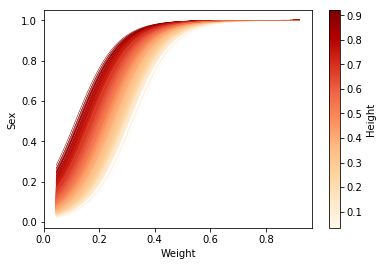

In [75]:
names = ['Age', 'Height', 'Weight', 'Season', 'Sport', 'Medal', 'region']

from pycebox.ice import ice, ice_plot
X_train_df = pd.DataFrame(X_train, columns=names)
def predict_new(X):
    return logreg1.predict_proba(X)[:,1]

Duration = ice(data=X_train_df, column='Weight', 
                   predict=predict_new)

ice_plot(Duration, linewidth=0.5, color_by='Height', cmap=plt.get_cmap('OrRd'))

pr_vals = X_train_df['Height'].values
sm = plt.cm.ScalarMappable(cmap=plt.get_cmap('OrRd'), 
                           norm=plt.Normalize(vmin=pr_vals.min(), 
                                              vmax=pr_vals.max()))

sm._A = []
plt.colorbar(sm, label='Height')
plt.ylabel('Sex')
plt.xlabel('Weight');

Из рисунка видно, что чем больше вес, тем больше пол стремится к единице, т.е. - к мужскому полу. Также чем больше значение роста, тем ближе график стремится к мужскому полу.

# 5. Выводы

В ходе проделанной работы были сделаны следующие выводы:
1. Exploratory Analysis:
    + За 120 лет было проведено 29 Летних и 21 Зимних Олимпийских игр;
    + Больше всех медалей за это время выиграли пресдавители США;
    + По Зимним Олимпийским играм наша страна находится на 1м месте;
    + Самые высокие спортсмены - баскетболисты и волейболисты. Самые низкие - гимнасты и дайверы;
    + Самые тяжелоые спортсмены - участники перетягования канатов, бейсболисты и бобслеисты. Самые легкие - гимнасты.
    + Топ 3 дисциплины нашей страны - атлетика, гимнастика и плавание.
    


2. Machine Learning:
    + Самая успешная по точности модель - Random Forest (91%);
    + Наиболее статистически значимые предиктор в Дереве решений - вес, вид спорта, страна и рост;
    + Чем больше рост и вес спортсмена, тем больше вероятность, что он мужского пола ==> модель адекватная :)
    